# **Trabalho Prático 3 - Mineração de dados**

**Professor:** Wagner Meira Jr.

**Aluna:** Helena Pato Magalhães

**Matrícula:** 2017095723

**Tema:** Classificação de saúde fetal

**Base de dados:** [Fetal Health Classification](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids

## Entendimento dos Dados

Importando dados

In [2]:
fetal_health = pd.read_csv('fetal_health.csv')
fetal_health

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


**Colunas**

`baseline value`
Baseline Fetal Heart Rate (FHR)

`accelerations`
Number of accelerations per second

`fetal_movement`
Number of fetal movements per second

`uterine_contractions`
Number of uterine contractions per second

`light_decelerations`
Number of LDs per second

`severe_decelerations`
Number of SDs per second

`prolongued_decelerations`
Number of PDs per second

`abnormal_short_term_variability`
Percentage of time with abnormal short term variability

`mean_value_of_short_term_variability`
Mean value of short term variability

`percentage_of_time_with_abnormal_long_term_variability`
Percentage of time with abnormal long term variability

`mean_value_of_long_term_variability`
Mean value of long term variability

`histogram_width`
Width of the histogram made using all values from a record

`histogram_min`
Histogram minimum value

`histogram_max`
Histogram maximum value

`histogram_number_of_peaks`
Number of peaks in the exam histogram

`histogram_number_of_zeroes`
Number of zeroes in the exam histogram

`histogram_mode`
Hist mode

`histogram_mean`
Hist mean

`histogram_median`
Hist Median

`histogram_variance`
Hist variance

`histogram_tendency`
Histogram trend

`fetal_health`
Fetal health: 1 - Normal 2 - Suspect 3 - Pathological

In [3]:
fetal_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Características dos dados

In [4]:
fetal_health[['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability']].describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000


In [5]:
fetal_health[['histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency',
 'fetal_health']].describe()

,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Distribuição dos dados

array([[<Axes: title={'center': 'baseline value'}>,
        <Axes: title={'center': 'accelerations'}>,
        <Axes: title={'center': 'fetal_movement'}>,
        <Axes: title={'center': 'uterine_contractions'}>,
        <Axes: title={'center': 'light_decelerations'}>],
       [<Axes: title={'center': 'severe_decelerations'}>,
        <Axes: title={'center': 'prolongued_decelerations'}>,
        <Axes: title={'center': 'abnormal_short_term_variability'}>,
        <Axes: title={'center': 'mean_value_of_short_term_variability'}>,
        <Axes: title={'center': 'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<Axes: title={'center': 'mean_value_of_long_term_variability'}>,
        <Axes: title={'center': 'histogram_width'}>,
        <Axes: title={'center': 'histogram_min'}>,
        <Axes: title={'center': 'histogram_max'}>,
        <Axes: title={'center': 'histogram_number_of_peaks'}>],
       [<Axes: title={'center': 'histogram_number_of_zeroes'}>,
        <Axes: ti

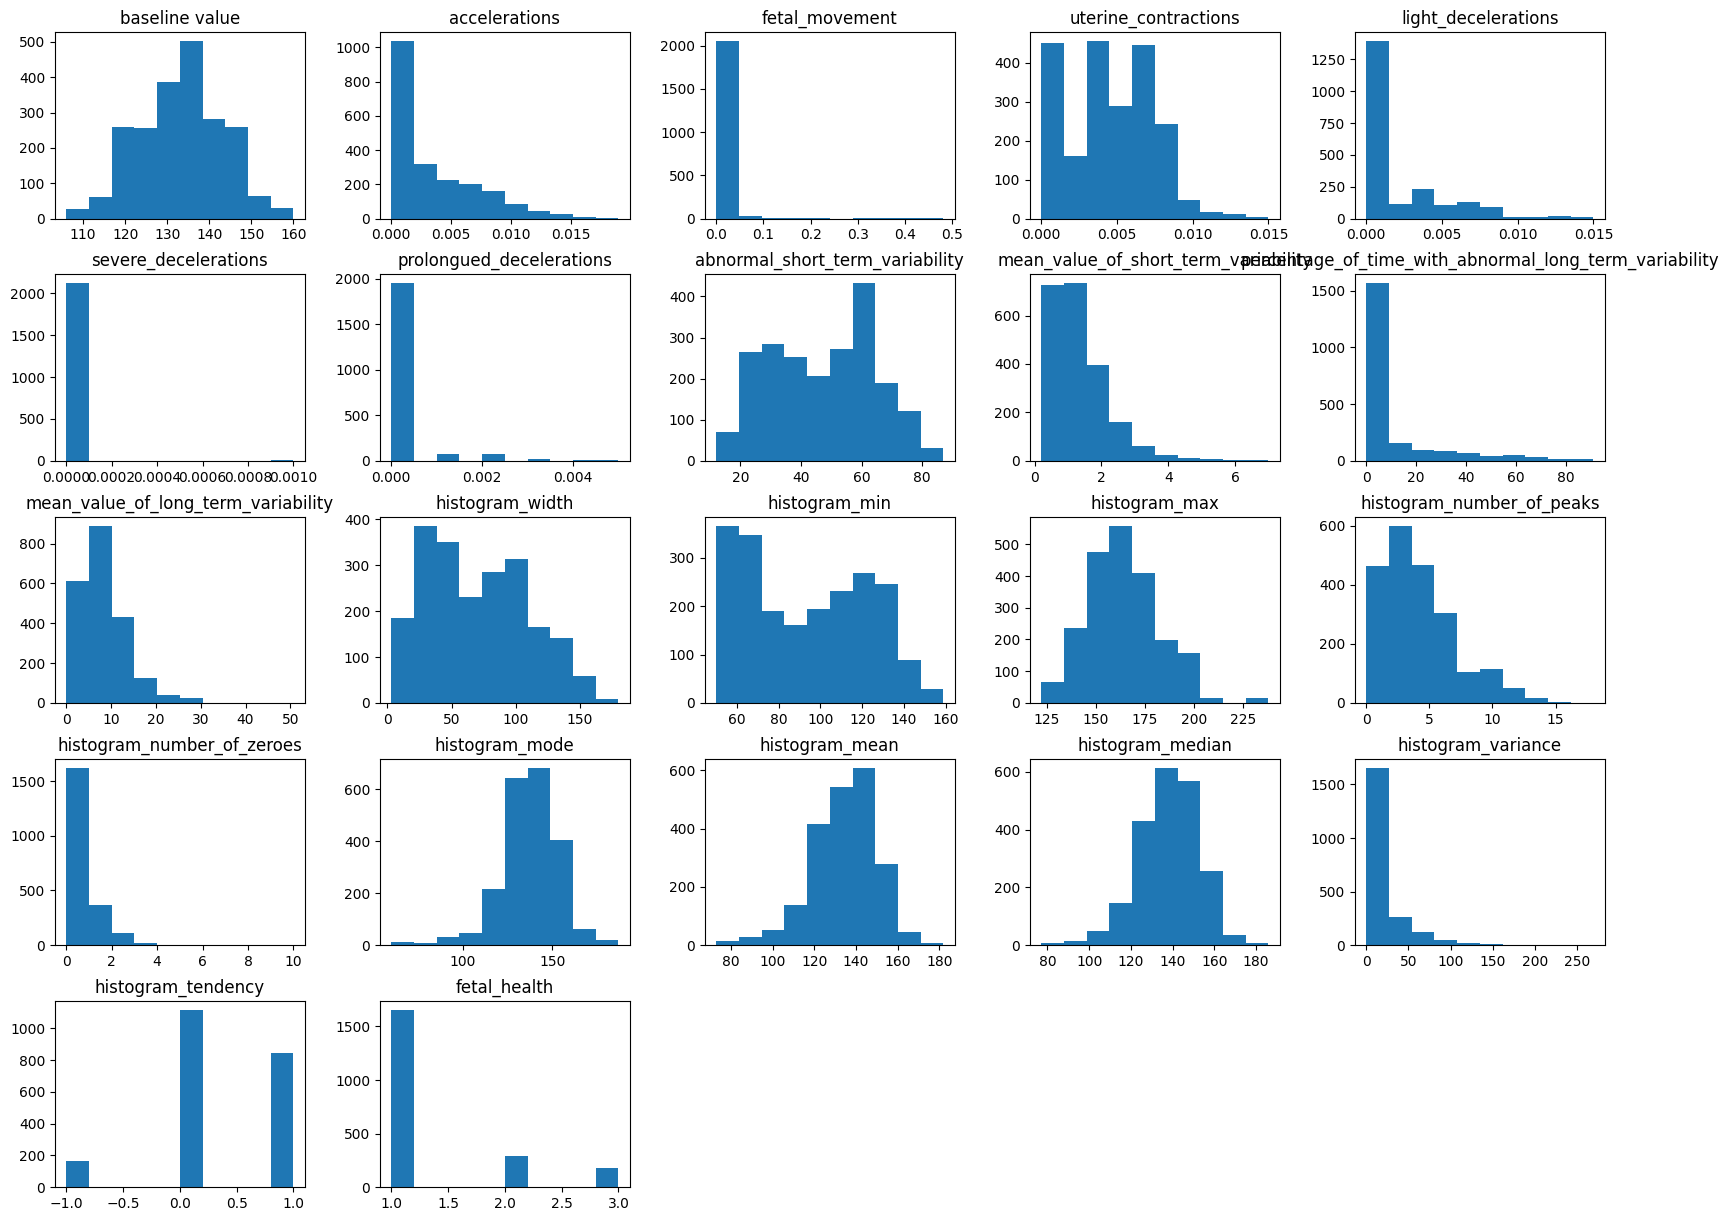

In [6]:
fetal_health.hist(figsize=(20,15), grid=False)

Text(0.5, 1.0, 'Saúde Fetal')

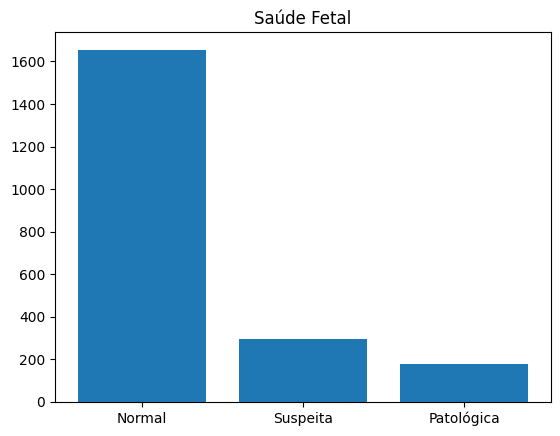

In [7]:
plt.bar(['Normal', 'Suspeita', 'Patológica'], fetal_health.groupby('fetal_health').count()['baseline value'])
plt.title('Saúde Fetal')

Correlação entre os dados

<Axes: >

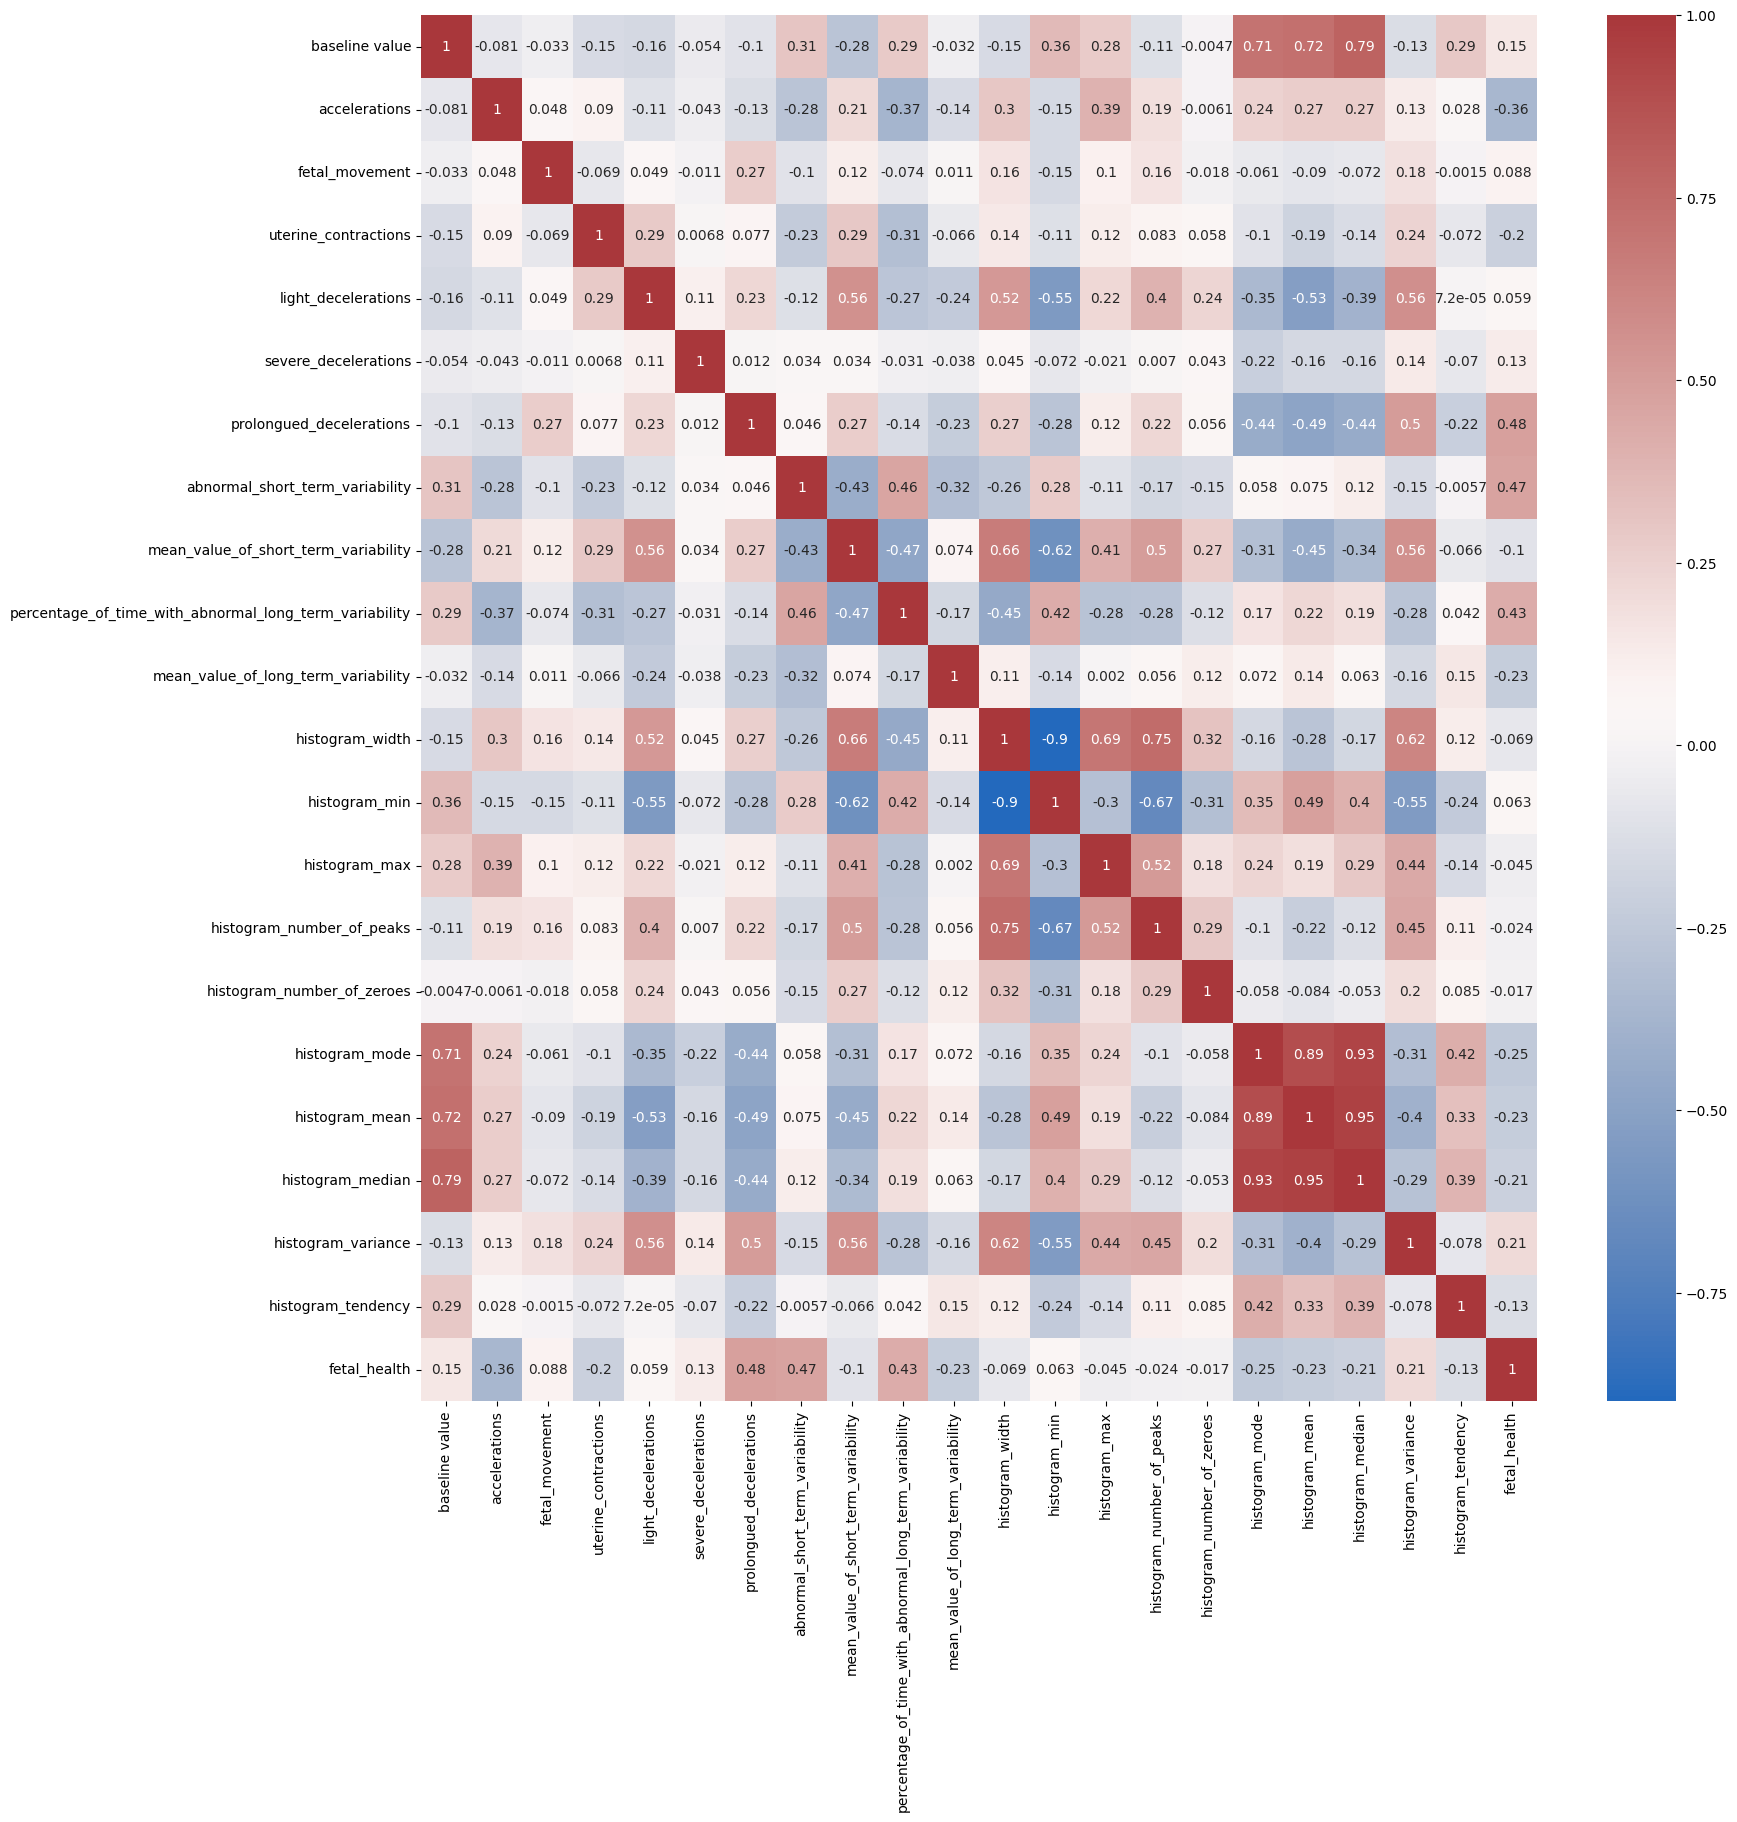

In [8]:
plt.subplots(figsize = (18, 18))
sns.heatmap(fetal_health.corr(), annot = True, cmap='vlag')

<Axes: xlabel='mean_value_of_short_term_variability', ylabel='histogram_min'>

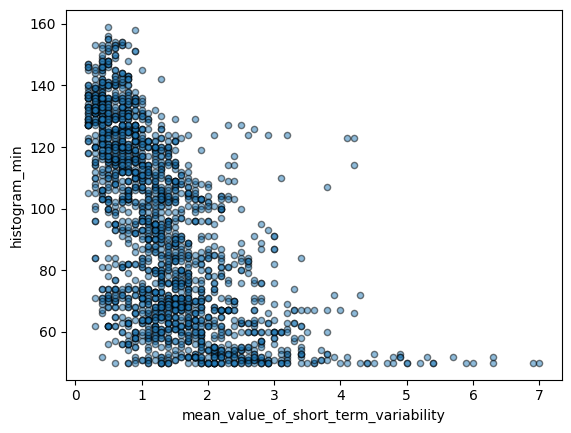

In [9]:
fetal_health.plot.scatter(x='mean_value_of_short_term_variability', y='histogram_min', alpha=0.5, edgecolor='k')

<Axes: xlabel='light_decelerations', ylabel='histogram_min'>

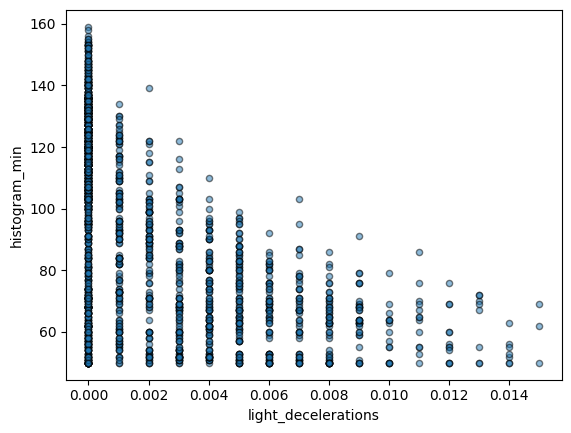

In [10]:
fetal_health.plot.scatter(x='light_decelerations', y='histogram_min', alpha=0.5, edgecolor='k')

<Axes: xlabel='light_decelerations', ylabel='histogram_mean'>

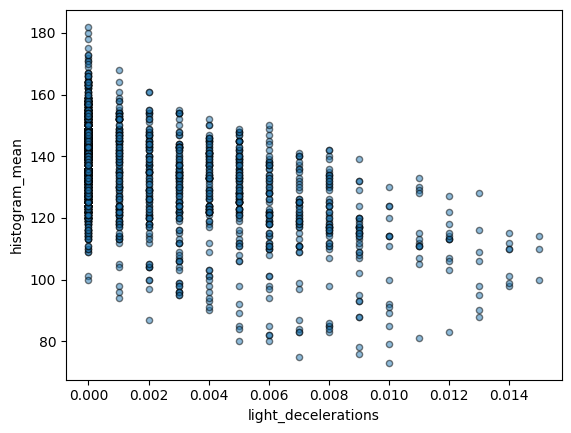

In [11]:
fetal_health.plot.scatter(x='light_decelerations', y='histogram_mean', alpha=0.5, edgecolor='k')

## Preparação dos Dados

Remove os rótulos e converte em array

In [12]:
fetal_health = pd.read_csv('fetal_health.csv')
y = fetal_health.pop('fetal_health')
fetal_health_array = np.array(fetal_health)
fetal_health_array.shape

(2126, 21)

Escala/normaliza os dados

[`sklearn.preprocessing.RobustScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)

In [13]:
scaler = RobustScaler()
scaler.fit(fetal_health_array)
X = scaler.transform(fetal_health_array)

Redução de dimensionalidade

[`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [14]:
pca = PCA(n_components=0.99, svd_solver='full', random_state=0)
pca.fit(X)
X = pca.transform(X)
pca.components_.shape # (n_components, n_features)

(7, 21)

Lidando com dados desbalanceados

In [15]:
Counter(y)

Counter({1.0: 1655, 2.0: 295, 3.0: 176})

Oversampling

[`imblearn.over_sampling.SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE)

In [16]:
smote = SMOTE(random_state=0)

X_over, y_over = smote.fit_resample(X, y)
Counter(y_over)

Counter({2.0: 1655, 1.0: 1655, 3.0: 1655})

Undersampling

[`imblearn.under_sampling.ClusterCentroids`](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html#imblearn.under_sampling.ClusterCentroids)

In [17]:
cc = ClusterCentroids(random_state=0)
X_und, y_und = cc.fit_resample(X, y)
Counter(y_und)

Counter({1.0: 176, 2.0: 176, 3.0: 176})

Dividindo em treino, validação e teste

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size=0.2, random_state=0)
X_over_valid, X_over_test, y_over_valid, y_over_test = train_test_split(X_over_test, y_over_test, test_size=0.5, random_state=0)

X_und_train, X_und_test, y_und_train, y_und_test = train_test_split(X_und, y_und, test_size=0.2, random_state=0)
X_und_valid, X_und_test, y_und_valid, y_und_test = train_test_split(X_und_test, y_und_test, test_size=0.5, random_state=0)

In [19]:
print(Counter(y_train))
print(Counter(y_over_train))
print(Counter(y_und_train))

Counter({1.0: 1329, 2.0: 237, 3.0: 134})
Counter({2.0: 1339, 1.0: 1322, 3.0: 1311})
Counter({2.0: 143, 1.0: 140, 3.0: 139})


## Modelagem



Treinando e avaliando um classificador de árvore de decisão

[`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [20]:
def decision_tree(X_train, y_train, X_valid, y_valid, plot_t=False):
  tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train, y_train)

  print('Tree depth:', tree.get_depth())

  y_pred_train = tree.predict(X_train)
  print('\nTrain accuracy:', accuracy_score(y_train, y_pred_train))

  y_pred_valid = tree.predict(X_valid)
  print('Validation accuracy:', accuracy_score(y_valid, y_pred_valid))

  print('Cross validation mean accuracy:', (cross_val_score(tree, X_valid, y_valid, cv=5)).mean())

  print('\nConfusion matrix')
  ConfusionMatrixDisplay.from_estimator(tree, X_valid, y_valid, normalize='true', cmap=plt.cm.Blues)
  plt.show()

  print('\nPrecision:', precision_score(y_valid, y_pred_valid, average='weighted'))
  print('Recall:', recall_score(y_valid, y_pred_valid, average='weighted'))
  print('F1:', f1_score(y_valid, y_pred_valid, average='weighted'))

  if plot_t:
    fig = plt.figure(figsize=(10, 4))
    _ = plot_tree(tree, max_depth=2, feature_names=fetal_health.columns, filled=True, fontsize=6)

Dados originais

Tree depth: 19

Train accuracy: 0.9988235294117647
Validation accuracy: 0.8356807511737089
Cross validation mean accuracy: 0.7459579180509414

Confusion matrix


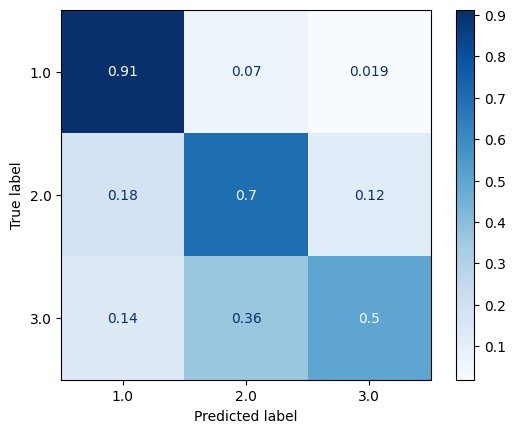


Precision: 0.8461115275531185
Recall: 0.8356807511737089
F1: 0.8387563969023142


In [21]:
decision_tree(X_train, y_train, X_valid, y_valid)

Oversampling

Tree depth: 18

Train accuracy: 0.9997482376636455
Validation accuracy: 0.8911290322580645
Cross validation mean accuracy: 0.8226868686868688

Confusion matrix


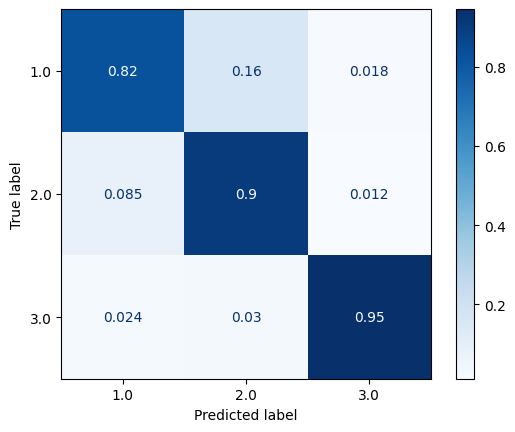


Precision: 0.8934962948739831
Recall: 0.8911290322580645
F1: 0.891383121873367


In [22]:
decision_tree(X_over_train, y_over_train, X_over_valid, y_over_valid)

Undersampling

Tree depth: 11

Train accuracy: 1.0
Validation accuracy: 0.7358490566037735
Cross validation mean accuracy: 0.6836363636363636

Confusion matrix


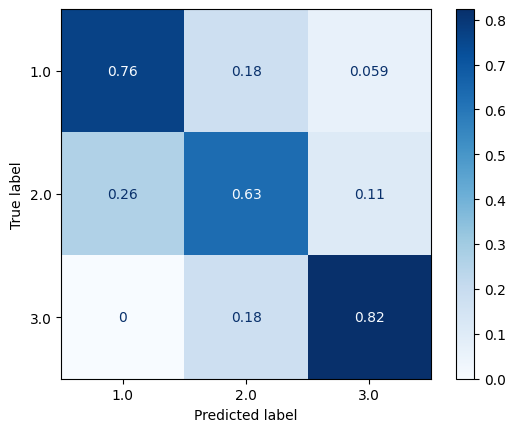


Precision: 0.7348008385744235
Recall: 0.7358490566037735
F1: 0.7349602972244482


In [23]:
decision_tree(X_und_train, y_und_train, X_und_valid, y_und_valid)

Treinando e avaliando um classificador de floresta aleatória

In [24]:
def random_forest(X_train, y_train, X_valid, y_valid):
  rf = RandomForestClassifier(n_estimators=50, max_depth=2, criterion='entropy', random_state=0)
  rf.fit(X_train, y_train)

  y_pred_train = rf.predict(X_train)
  print('Train accuracy:', accuracy_score(y_train, y_pred_train))

  y_pred_valid = rf.predict(X_valid)
  print('Validation accuracy:', accuracy_score(y_valid, y_pred_valid))

  print('Cross validation mean accuracy:', (cross_val_score(rf, X_valid, y_valid, cv=5)).mean())

  print('\nConfusion matrix')
  ConfusionMatrixDisplay.from_estimator(rf, X_valid, y_valid, normalize='true', cmap=plt.cm.Blues)
  plt.show()

  print('\nPrecision:', precision_score(y_valid, y_pred_valid, average='weighted'))
  print('Recall:', recall_score(y_valid, y_pred_valid, average='weighted'))
  print('F1:', f1_score(y_valid, y_pred_valid, average='weighted'))

Dados originais

Train accuracy: 0.8035294117647059
Validation accuracy: 0.7511737089201878
Cross validation mean accuracy: 0.7510520487264674

Confusion matrix


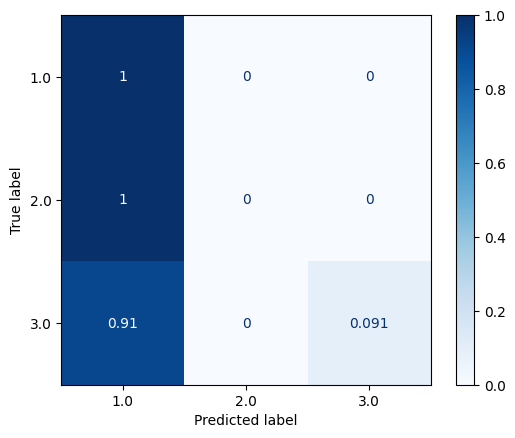


Precision: 0.6587455221057784
Recall: 0.7511737089201878
F1: 0.6524549283051515


/Users/helena/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
random_forest(X_train, y_train, X_valid, y_valid)

Oversampling

Train accuracy: 0.8008559919436052
Validation accuracy: 0.8024193548387096
Cross validation mean accuracy: 0.8085858585858585

Confusion matrix


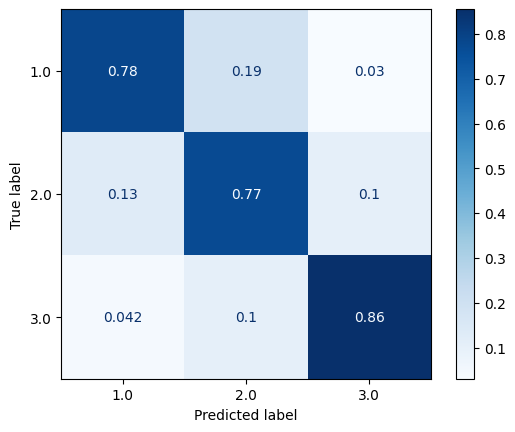


Precision: 0.8045318807813984
Recall: 0.8024193548387096
F1: 0.8030852437239081


In [26]:
random_forest(X_over_train, y_over_train, X_over_valid, y_over_valid)

Undersampling

Train accuracy: 0.7701421800947867
Validation accuracy: 0.7358490566037735
Cross validation mean accuracy: 0.6290909090909091

Confusion matrix


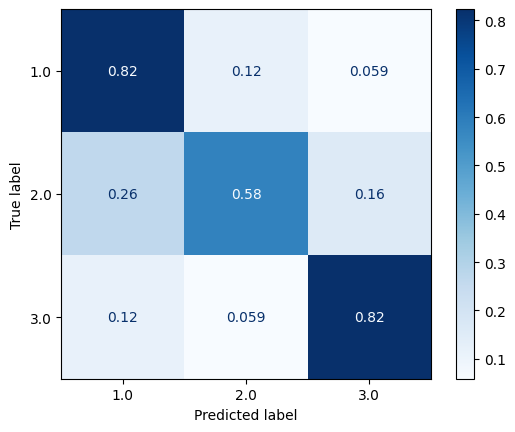


Precision: 0.7449835280023959
Recall: 0.7358490566037735
F1: 0.7319430652101953


In [27]:
random_forest(X_und_train, y_und_train, X_und_valid, y_und_valid)

## Avaliação

Escolhido o melhor modelo (árvore de decisão com oversampling) usamos as mesmas métricas nos dados de teste correspondentes

Tree depth: 18

Train accuracy: 0.9997482376636455
Validation accuracy: 0.9195171026156942
Cross validation mean accuracy: 0.809070707070707

Confusion matrix


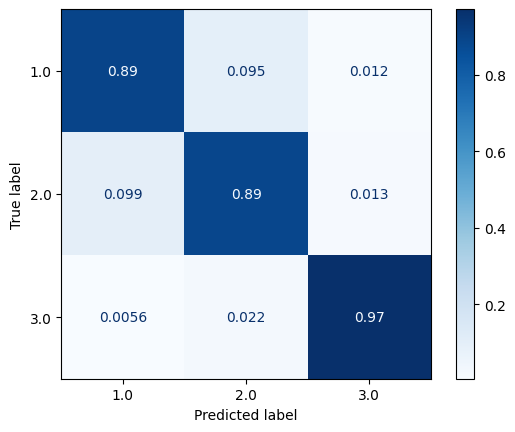


Precision: 0.9198676869923875
Recall: 0.9195171026156942
F1: 0.9196529069408271


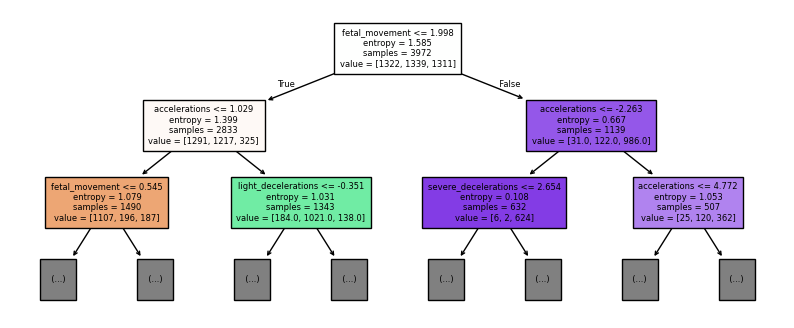

In [28]:
decision_tree(X_over_train, y_over_train, X_over_test, y_over_test, True)

Testamos também nos dados originais de teste

Tree depth: 18

Train accuracy: 0.9997482376636455
Validation accuracy: 0.9859154929577465
Cross validation mean accuracy: 0.8640088593576966

Confusion matrix


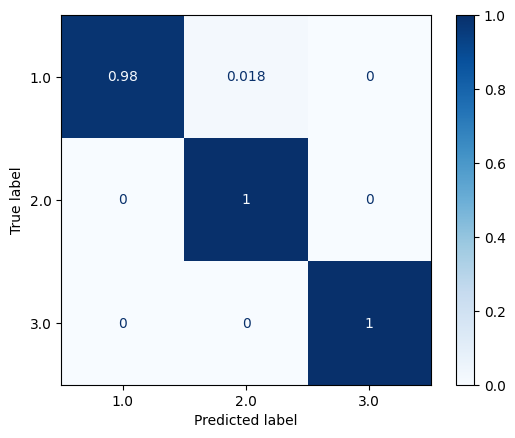


Precision: 0.9874245472837023
Recall: 0.9859154929577465
F1: 0.9862506673561683


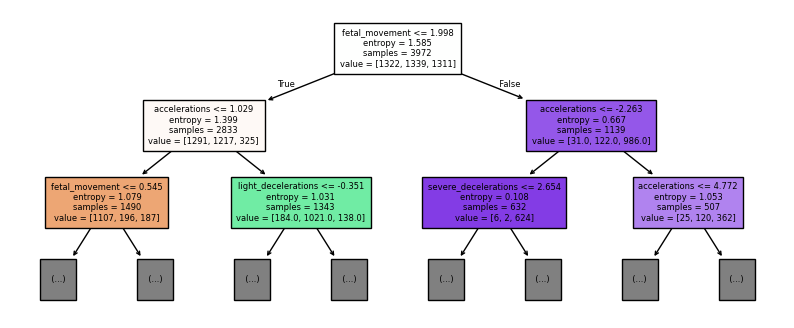

In [29]:
decision_tree(X_over_train, y_over_train, X_test, y_test, True)